In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from SVM import BinarizedSVM

In [3]:
df = pd.read_csv('datasets/bands.data',header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
537,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
538,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
539,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


In [5]:
df[6].value_counts()

2    200
1    145
Name: 6, dtype: int64

In [33]:
# trasformo le etichette da [1,2] a [-1,1]
y = df[6].apply(lambda x: 1 if x==2 else -1).values
# prendo solo le prime 6 colonne, che corrispondono a quelle delle feature
X = df.values[:,:6]

In [34]:
X = MinMaxScaler().fit_transform(X)

In [61]:
X.shape

(345, 6)

In [63]:
scores = {}
for C in [1,10,100,1000,10000,1000000]:
    svm = BinarizedSVM(C=1000000, verbose=True)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    scores[C] = accuracy_score(y, y_pred)

scores

Varibles names: ['0', '1', '2', '3', '4', '5']

Addestramento completato in 4 iterate
Le soglie selezionate sono: {0: [0.6578947368421051, 0.368421052631579, 0.44736842105263164], 1: [0.38260869565217387, 0.12173913043478263, 0.46956521739130436, 0.3391304347826087, 0.16521739130434782], 2: [0.1456953642384106, 0.11920529801324503], 3: [0.2337662337662338, 0.19480519480519481], 4: [0.0684931506849315, 0.0547945205479452, 0.05821917808219178], 5: [0.15000000000000002, 0.05, 0.75, 0.2]}
Varibles names: ['0', '1', '2', '3', '4', '5']

Addestramento completato in 4 iterate
Le soglie selezionate sono: {0: [0.6578947368421051, 0.368421052631579, 0.44736842105263164], 1: [0.38260869565217387, 0.12173913043478263, 0.46956521739130436, 0.3391304347826087, 0.16521739130434782], 2: [0.1456953642384106, 0.11920529801324503], 3: [0.2337662337662338, 0.19480519480519481], 4: [0.0684931506849315, 0.0547945205479452, 0.05821917808219178], 5: [0.15000000000000002, 0.05, 0.75, 0.2]}
Varibles names: ['0'

{1: 0.5797101449275363,
 10: 0.5797101449275363,
 100: 0.5797101449275363,
 1000: 0.5797101449275363,
 10000: 0.5797101449275363,
 1000000: 0.5797101449275363}

In [64]:
scores

{1: 0.5797101449275363,
 10: 0.5797101449275363,
 100: 0.5797101449275363,
 1000: 0.5797101449275363,
 10000: 0.5797101449275363,
 1000000: 0.5797101449275363}

[0.6578947368421051] [3.3856696634732533]


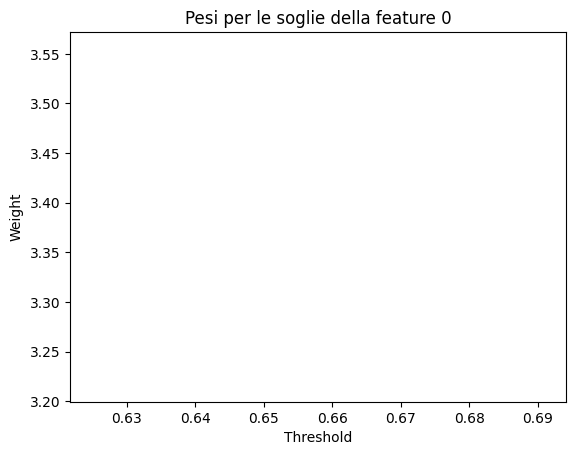

[0.12173913043478263, 0.38260869565217387, 0.46956521739130436] [217.1279640715397, 19.7845870665118, -66.18919476048522]


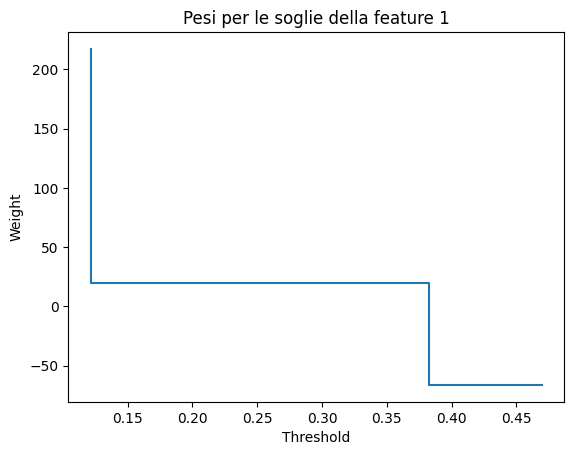

[0.11920529801324503, 0.1456953642384106] [66.3282061292141, -4.491797272688576]


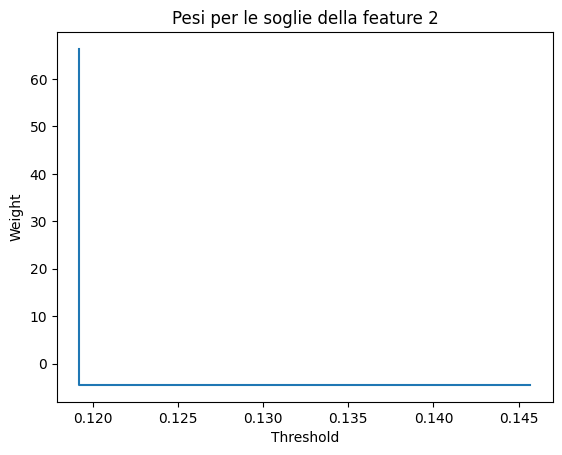

[0.19480519480519481, 0.2337662337662338] [59.91923853645604, -30.196622687832537]


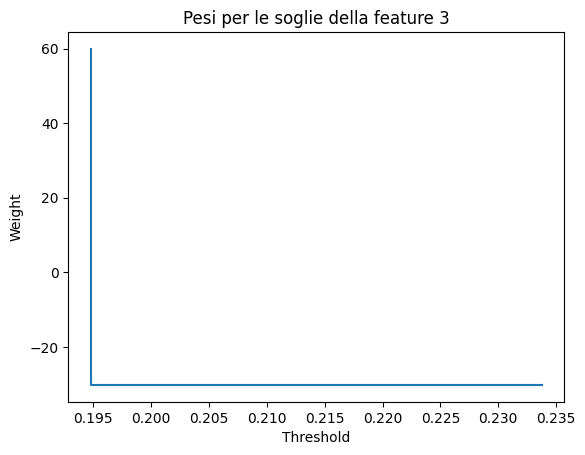

[0.0547945205479452, 0.05821917808219178, 0.0684931506849315] [20.837088783558496, 13.28432629300388, -3.3333333324851964]


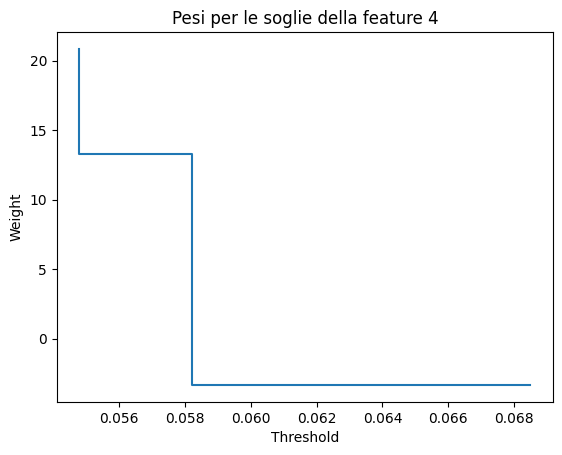

[0.05, 0.15000000000000002, 0.75, 0.75] [53.18494764904407, -23.885714642713953, -218.83333333397408, -218.83333333397408]


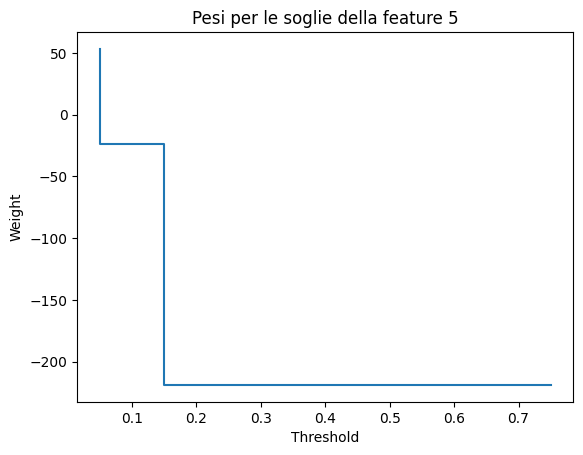

In [40]:
svm.visualizza_soglie()

In [41]:
from sklearn.svm import SVC

In [50]:
svc = SVC(C=1000000)
svc.fit(X, y)
accuracy_score(svc.predict(X), y)

0.991304347826087